In [2]:
import cv2 as cv2
import os
import numpy as np
import matplotlib.pyplot as plt

Image preprocessing for tesseract
1. Image resolution >= 300 dpi
2. Noise removal by processes like image to grayscale, dilation, erosion and blurring.

In [3]:
img_path='/home/rahulsuresh/python-environments/pricelabel1.jpg'
img = cv2.imread(img_path)

In [4]:
img.shape

(3000, 4000, 3)

In [5]:
img = cv2.resize(img, None, fx=1.5, fy=1.5, interpolation=cv2.INTER_CUBIC)
#300 dpi is generally more than 3264 x 2448 pixels

In [6]:
cv2.imwrite('pricelabel3.jpg',img)

True

In [7]:
img.shape

(4500, 6000, 3)

Text(0.5, 1.0, 'Input Image expanded')

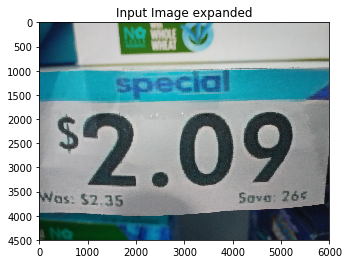

In [8]:
plt.imshow(img)
plt.title("Input Image expanded")

In [9]:
def noise_reduction(img):
    # Convert to gray
    #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply dilation and erosion to remove some noise
    kernel = np.ones((1, 1), np.uint8)
    img = cv2.dilate(img, kernel, iterations=1)
    img = cv2.erode(img, kernel, iterations=1)
    return img 

In [10]:
img=noise_reduction(img)

Text(0.5, 1.0, 'After Noise reduction')

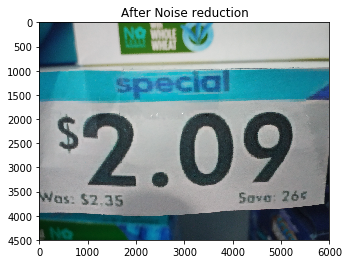

In [11]:
plt.imshow(img,'gray')
plt.title("After Noise reduction")

In [12]:
def blur(img):
    img_array=[]
    kernel_size=[3,5,9]
    for i in kernel_size:
        img_array.append(cv2.GaussianBlur(img, (i, i), 0))
    media_size=[3,5]
    for i in media_size:
        img_array.append(cv2.medianBlur(img, 5))
    return np.array(img_array)

In [13]:
img_array=blur(img)

In [14]:
img_array.shape

(5, 4500, 6000, 3)

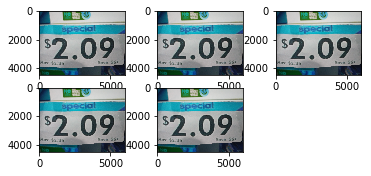

In [15]:
for i in range(0,img_array.shape[0]):
    plt.subplot(3,3, i+1)
    #plt.title(titles[i])
    plt.imshow(img_array[i],'gray')

In [22]:
def threshold(img_array):
    thresh=[]
    for img in img_array:
        _,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
        _,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
        _,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
        _,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
        _,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)
        #_,thresh6 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        #_,thresh7=cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 31, 2)
        #thresh.append([thresh1,thresh2,thresh3,thresh4,thresh5,thresh6])
        thresh.append(thresh1)
        thresh.append(thresh2)
        thresh.append(thresh3)
        thresh.append(thresh4)
        thresh.append(thresh5)
        #thresh.append(thresh6)
    return np.array(thresh)


In [23]:
results=threshold(img_array)

In [24]:
results.shape

(25, 4500, 6000, 3)

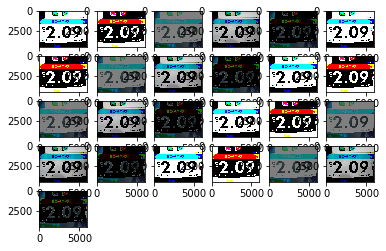

In [25]:
for i in range(0, results.shape[0]):
    plt.subplot(5,6, i+1)
    #plt.title(titles[i])
    plt.imshow(results[i],'gray')

In [26]:
count=0

In [27]:
for image in results:
    cv2.imwrite("testing/frame%d.jpg" % count, image) 
    count+=1